In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import glob
import matplotlib.pyplot as plt
%matplotlib inline

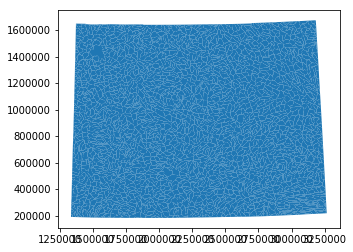

In [9]:
huc12 = gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp') #reads in the hydraulic basin units and adds an area column
huc12 = huc12.to_crs({'init': 'epsg:3732'})
huc12.plot()

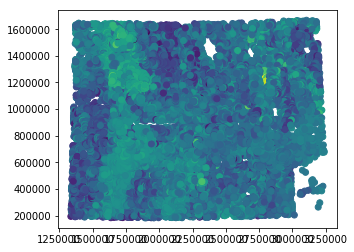

In [3]:
df= pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\imputed.csv') #reads in the point data
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
#writes the point data to a shapefile in the dir called data.shp
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
crs = {'init': 'epsg:3732'} #http://www.spatialreference.org/ref/epsg/2263/
geo_df = GeoDataFrame(df, crs={'init': 'epsg:4326'}, geometry=geometry)

geo_df.to_file(driver='ESRI Shapefile', filename='data.shp')
projGeoDF=geo_df.to_crs(crs)

projGeoDF.plot(column='al_pct')

In [4]:
points_with_basin=gpd.sjoin(huc12, projGeoDF, how='inner', op='intersects')

In [14]:
maximal = points_with_basin.dissolve(by='HUC_12', aggfunc='max')

In [32]:
maximal = maximal.drop(columns=['AREA', 'PERIMETER', 'WY_HU12_', 'WY_HU12_ID', 'HUC_8',
       'HUC_10', 'ACRES', 'STATES', 'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME',
       'HU_10_MOD', 'HU_10_TYPE', 'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD',
       'HU_12_TYPE', 'HU_2_NAME', 'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME',
       'Shape_Leng', 'Shape_Area', 'index_right', 'Unnamed: 0'])

In [6]:
medians = points_with_basin.dissolve(by='HUC_12', aggfunc='median')
medians = medians.drop(columns=['AREA', 'PERIMETER', 'WY_HU12_', 'WY_HU12_ID', 'HUC_8',
       'HUC_10', 'ACRES', 'STATES', 'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME',
       'HU_10_MOD', 'HU_10_TYPE', 'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD',
       'HU_12_TYPE', 'HU_2_NAME', 'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME',
       'Shape_Leng', 'Shape_Area', 'index_right', 'Unnamed: 0'])
medians.to_file(driver='ESRI Shapefile', filename='median_nure_values.shp')

KeyError: "labels ['HUC_8' 'HUC_10' 'STATES' 'HU_10_DS' 'HU_10_NAME' 'HU_10_MOD'\n 'HU_10_TYPE' 'HU_12_DS' 'HU_12_NAME' 'HU_12_MOD' 'HU_12_TYPE' 'HU_2_NAME'\n 'HU_4_NAME' 'HU_6_NAME' 'HU_8_NAME'] not contained in axis"

# Bring in the hotpot analysis and combine the shapefiles

In [248]:
path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\hotspot analysis\\fuck arcgis\\'
allFiles=glob.glob(path+"*.csv")
frame=pd.DataFrame
listed=[]
for file in allFiles:
    df = pd.read_csv(file, index_col=[0])
    listed.append(df)
frame = pd.concat(listed, sort=False)

In [249]:
frame = frame.drop(columns=['Join_Count', 'TARGET_FID', 'AREA', 'PERIMETER', 'WY_HU12_',
       'WY_HU12_ID', 'HUC_8', 'HUC_10', 'ACRES', 'STATES',
       'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME', 'HU_10_MOD', 'HU_10_TYPE',
       'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD', 'HU_12_TYPE', 'HU_2_NAME',
       'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME', 'Shape_Leng', 'SOURCE_ID',
       'ag_ppm', 'GiPValue', 'NNeighbors', 'Gi_Bin',
       'Shape_Length', 'Shape_Area', 'al_pct', 'as_ppm', 'au_ppm', 'b_ppm',
       'ba_ppm', 'be_ppm', 'bi_ppm', 'ca_pct', 'cd_ppm', 'ce_ppm', 'cl_ppm',
       'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm', 'eu_ppm', 'fe_pct',
       'hf_ppm', 'k_pct', 'la_ppm', 'li_ppm', 'lu_ppm', 'mg_pct', 'mn_ppm',
       'mo_ppm', 'na_pct', 'nb_ppm', 'ni_ppm', 'p_ppm', 'pb_ppm', 'rb_ppm',
       'sb_ppm', 'sc_ppm', 'sn_ppm', 'sr_ppm', 'ta_ppm', 'tb_ppm', 'th_ppm',
       'ti_ppm', 'v_ppm', 'w_ppm', 'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm'])

In [250]:
summary = frame.groupby('HUC_12', as_index=False).sum()


In [251]:
middle=huc12.merge(summary.astype(object), on='HUC_12', how='right')

In [252]:
combined = huc12.merge(middle[['HUC_12', 'GiZScore']].astype(str), on='HUC_12', how='left')

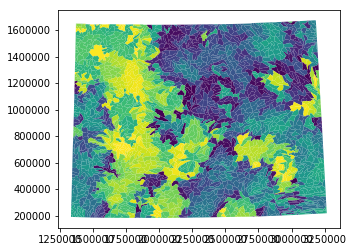

In [253]:
combined.plot(column='GiZScore', cmap='viridis')

In [109]:
pb = pd.read_csv(r'J:\Geology\WSGS\Projects\Critical Minerals\hotspot analysis\fuck arcgis\zn.csv')
clearred = pb.drop(columns=['Join_Count', 'TARGET_FID', 'AREA', 'PERIMETER', 'WY_HU12_',
       'WY_HU12_ID', 'HUC_8', 'HUC_10', 'ACRES', 'STATES',
       'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME', 'HU_10_MOD', 'HU_10_TYPE',
       'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD', 'HU_12_TYPE', 'HU_2_NAME',
       'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME', 'Shape_Leng', 'SOURCE_ID',
       'GiPValue', 'NNeighbors', 'Gi_Bin']).groupby('HUC_12', as_index=False).sum()
m = huc12.merge(clearred.astype(object), on='HUC_12', how='right')
combined = huc12.merge(m[['HUC_12', 'GiZScore']].astype(str), on='HUC_12', how='left')

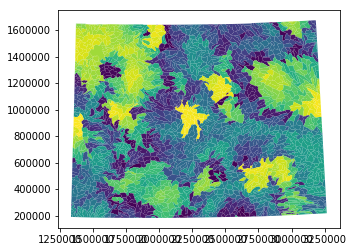

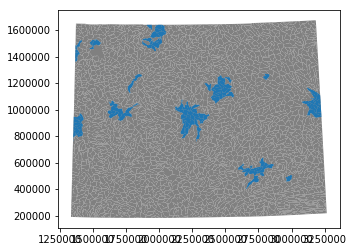

In [113]:
combined.plot(column='GiZScore', cmap='viridis')
fig, ax = plt.subplots()
combined.plot( color='gray', ax=ax)
combined[pd.to_numeric(combined['GiZScore'])>=np.percentile(pd.to_numeric(combined['GiZScore']), 95)].plot(ax=ax)

### Here is a list of deposit types

* Cr, Cu-Ni
* Ni
* Cr
* Pt
* Ti
* Cu-U-Au-REE
* Sn-W
* U
* Cu
* Mo-Sn
* Cu-Pb-Zn-W
* Pb-Zn-F-Ba
* Co
* Sb
* Cu-Zn
* Pb-Cu-Zn
* Fe
* Ba
* Mn
* Pb-Zn


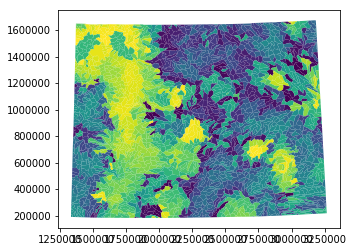

In [96]:
huc12 = gpd.read_file(r'J:\Geology\WSGS\GIS\huc_12.shp') #reads in the hydraulic basin units and adds an area column
huc12 = huc12.to_crs({'init': 'epsg:3732'})

path = r'J:\\Geology\\WSGS\\Projects\\Critical Minerals\\hotspot analysis\\fuck arcgis\\critical\\'
allFiles=glob.glob(path+"*.csv")
frame=pd.DataFrame
listed=[]
for file in allFiles:
    df = pd.read_csv(file, index_col=[0])
    listed.append(df)
frame = pd.concat(listed, sort=False)
frame = frame.drop(columns=['Join_Count', 'TARGET_FID', 'AREA', 'PERIMETER', 'WY_HU12_',
       'WY_HU12_ID', 'HUC_8', 'HUC_10', 'ACRES', 'STATES',
       'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME', 'HU_10_MOD', 'HU_10_TYPE',
       'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD', 'HU_12_TYPE', 'HU_2_NAME',
       'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME', 'Shape_Leng', 'SOURCE_ID',
       'GiPValue', 'NNeighbors', 'Gi_Bin',
       'Shape_Length', 'Shape_Area'])
summary = frame.groupby('HUC_12', as_index=False).sum()
middle=huc12.merge(summary.astype(object), on='HUC_12', how='right')
combined = huc12.merge(middle[['HUC_12', 'GiZScore']].astype(str), on='HUC_12', how='left')
combined.plot(column='GiZScore', cmap='viridis')

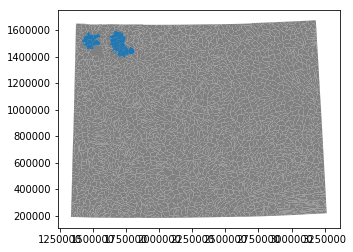

In [97]:
fig, ax = plt.subplots()
combined.plot( color='gray', ax=ax)
combined[pd.to_numeric(combined['GiZScore'])>=np.percentile(pd.to_numeric(combined['GiZScore']), 99)].plot(ax=ax)


In [98]:
combined[pd.to_numeric(combined['GiZScore'])>=np.percentile(pd.to_numeric(combined['GiZScore']), 99)].to_file(driver='ESRI Shapefile', filename='critical.shp')